<a href="https://colab.research.google.com/github/JustinHuang4/PlantDoc-An-App-to-Diagnose-Plants/blob/main/PlantDocAIModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PlantDocAIModel
by Justin Huang

Using the latest technology and software to build an application to aid farmers, planters, and gardeners alike in diagnosing and nurturing their plants.


##import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pathlib
import cv2
import glob

Mounted at /content/drive


#assign data labels for plant disease dataset

In [ ]:

Apple___Black_rot = '/content/drive/MyDrive/PlantDiseaseImgs/Apple___Black_rot'
Apple___healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Apple___healthy'
Cherry____healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Cherry_(including_sour)___healthy'
Cherry____Powdery_mildew = '/content/drive/MyDrive/PlantDiseaseImgs/Cherry_(including_sour)___Powdery_mildew'
Corn____healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Corn_(maize)___healthy'
Corn____Northern_Leaf_Blight = '/content/drive/MyDrive/PlantDiseaseImgs/Corn_(maize)___Northern_Leaf_Blight'
Grape___Black_rot = '/content/drive/MyDrive/PlantDiseaseImgs/Grape___Black_rot'
Grape___healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Grape___healthy'
Potato___Early_blight = '/content/drive/MyDrive/PlantDiseaseImgs/Potato___Early_blight'
Potato___healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Potato___healthy'
Tomato___Bacterial_spot = '/content/drive/MyDrive/PlantDiseaseImgs/Tomato___Bacterial_spot'
Tomato___healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Tomato___healthy'
Tomato___Tomato_mosaic_virus = '/content/drive/MyDrive/PlantDiseaseImgs/Tomato___Tomato_mosaic_virus'

Apple___Black_rot = [cv2.imread(image) for image in glob.glob(Apple___Black_rot)]
Apple___healthy = [cv2.imread(image) for image in glob.glob(Apple___healthy)]
Cherry____healthy = [cv2.imread(image) for image in glob.glob(Cherry____healthy)]
Cherry____Powdery_mildew = [cv2.imread(image) for image in glob.glob(Cherry____Powdery_mildew)]
Corn____healthy = [cv2.imread(image) for image in glob.glob(Corn____healthy)]
Corn____Northern_Leaf_Blight  = [cv2.imread(image) for image in glob.glob(Corn____Northern_Leaf_Blight)]
Grape___Black_rot = [cv2.imread(image) for image in glob.glob(Grape___Black_rot)]
Grape___healthy = [cv2.imread(image) for image in glob.glob(Grape___healthy)]
Potato___Early_blight = [cv2.imread(image) for image in glob.glob(Potato___Early_blight)]
Potato___healthy = [cv2.imread(image) for image in glob.glob(Potato___healthy)]
Tomato___Bacterial_spot = [cv2.imread(image) for image in glob.glob(Tomato___Bacterial_spot)]
Tomato___healthy = [cv2.imread(image) for image in glob.glob(Tomato___healthy)]
Tomato___Tomato_mosaic_virus = [cv2.imread(image) for image in glob.glob(Tomato___Tomato_mosaic_virus)]


#split data into training and testing for model
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantDiseaseImgs',
    validation_split = 0.2,
    subset = "training",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 64
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantDiseaseImgs',
    validation_split = 0.2,
    subset = "validation",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 64
)





train_dataset = train_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)


Found 2430 files belonging to 13 classes.
Using 1944 files for training.
Found 2430 files belonging to 13 classes.
Using 486 files for validation.


##Model



In [ ]:

model = Sequential ([
    
    
    layers.Rescaling(1/255, input_shape = (256, 256, 3)), #input layer for input data
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(13, activation = 'softmax') #because there are 13 classes/categories of plant conditions.
    #softmax used because: it assigns decimal probabilities to each category in a multi-class problem
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

"\n\nmodel = Sequential ([\n    layers.Rescaling(1./255, input_shape = (227, 227, 3)),\n    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),\n    layers.MaxPooling2D(),\n    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),\n    layers.MaxPooling2D(),\n    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),\n    layers.MaxPooling2D(),\n    layers.Flatten(),\n    layers.Dense(128, activation = 'relu'),\n    layers.Dense(2)\n])\n\nmodel.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])\n\nmodel.fit (\n    train_dataset, \n    validation_data = val_dataset,\n    epochs = 70\n)\nmodel.save('PlantDocModel.h5')\n"

#train model

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
'''
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'],  run_eagerly=True
)

'''
model.fit (
    train_dataset, 
    validation_data = val_dataset,
    epochs = 90
)


Epoch 1/90


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


31/31 [==============================] - 777s 11s/step - loss: 1.8400 - accuracy: 0.5401 - val_loss: 2.1130 - val_accuracy: 0.5947
Epoch 2/90
31/31 [==============================] - 7s 214ms/step - loss: 1.4740 - accuracy: 0.5700 - val_loss: 1.5006 - val_accuracy: 0.6440
Epoch 3/90
31/31 [==============================] - 7s 211ms/step - loss: 1.0544 - accuracy: 0.6759 - val_loss: 0.9924 - val_accuracy: 0.6831
Epoch 4/90
31/31 [==============================] - 7s 212ms/step - loss: 0.8151 - accuracy: 0.7397 - val_loss: 0.9088 - val_accuracy: 0.7449
Epoch 5/90
31/31 [==============================] - 7s 213ms/step - loss: 0.6052 - accuracy: 0.8112 - val_loss: 0.7456 - val_accuracy: 0.7922
Epoch 6/90
31/31 [==============================] - 7s 212ms/step - loss: 0.4526 - accuracy: 0.8616 - val_loss: 0.6564 - val_accuracy: 0.8107
Epoch 7/90
31/31 [==============================] - 7s 213ms/step - loss: 0.3279 - accuracy: 0.8951 - val_loss: 0.5106 - val_accuracy: 0.8663
Epoch 8/90
31/31 

#shows train and test accuracies above

##Evaluate Performance

##shows accuracies and errors in prediction of categories

Text(0.5, 1.0, 'Training-Validation Accuracy')

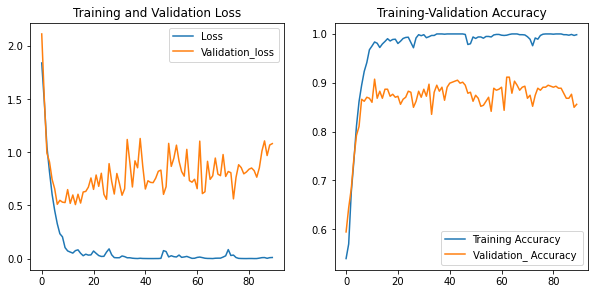

In [ ]:
loss = pd.DataFrame(model.history.history) 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

##Save Model For Web Application Deployment

In [ ]:
model.save('PlantDocModel2.h5')


##Streamlit install code for web app

In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
!pip install st-btn-select

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.70.0
    Uninstalling google-api-python-client-2.70.0:
      Successfully uninstalled google-api-python-client-2.70.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.11.2 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 1.0.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p